### Importing Necessary Libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing dataset

In [77]:
police = pd.read_csv("./Dataset/3. Police Data.csv")
police


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


### Q. 1) Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.


In [78]:
police.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [79]:
police.shape

(65535, 15)

In [80]:
del police["country_name"]


In [81]:
police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

### Q. 2) Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ?

In [82]:
filter = police[police["violation"] == "Speeding"]


<Axes: xlabel='driver_gender', ylabel='count'>

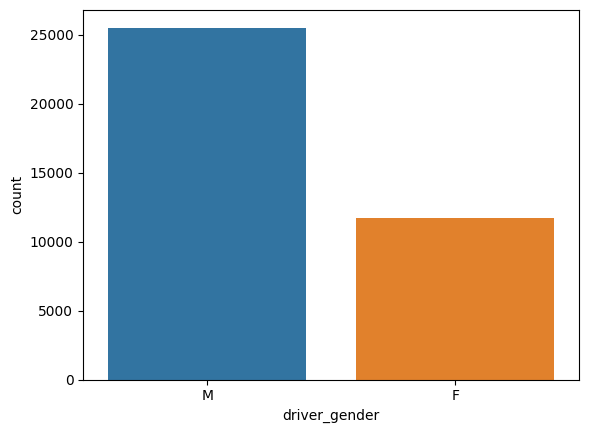

In [83]:
sns.countplot(data=filter,x='driver_gender')


### Q. 3) Question ( Groupby ) - Does gender affect who gets searched during a stop ?

In [84]:
filter1 = police.groupby("driver_gender", as_index=False).sum()[
    ["search_conducted", "driver_gender"]
]
# police['driver_gender'].value_counts()
filter1


,search_conducted,driver_gender
0,366,F
1,2113,M


<Axes: xlabel='search_conducted', ylabel='count'>

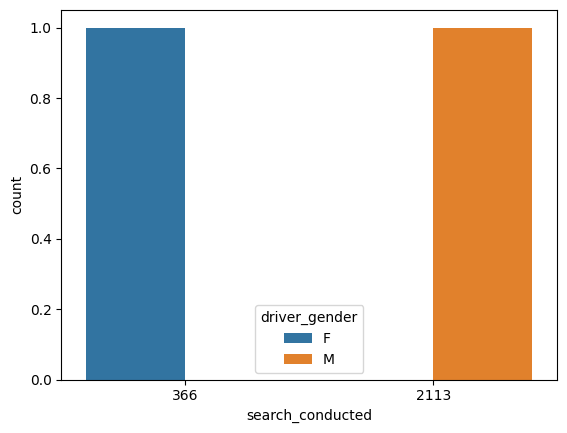

In [85]:
sns.countplot(x="search_conducted", data=filter1, hue="driver_gender")


### Q. 4) Question ( mapping + data-type casting ) - What is the mean stop_duration ?

In [86]:
police["mean_stop"] = police["stop_duration"].map(
    {"0-15 Min": 7.5, "16-30 Min": 23.0, "30+ Min": 45, "2": 1}
)
police['mean_stop'].mean()


12.00101667344449

<Axes: xlabel='mean_stop', ylabel='Density'>

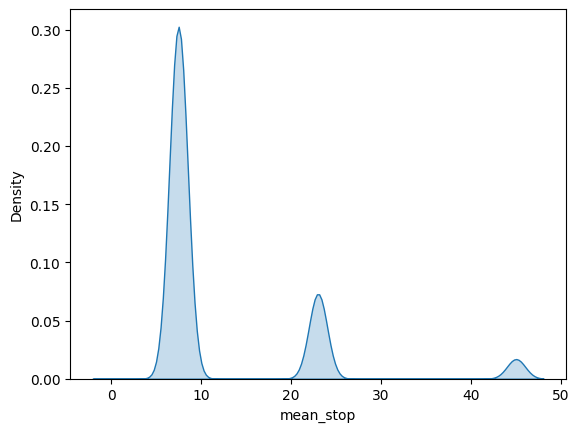

In [87]:
sns.kdeplot(police["mean_stop"], fill=True)


### Q. 5) Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [88]:
police.groupby(["violation"]).describe()[["driver_age"]]


driver_age                                                 
                         count       mean        std   min   25%   50%   75%   
violation                                                                      
Equipment               6507.0  31.682957  11.380671  16.0  23.0  28.0  39.0  \
Moving violation       11876.0  36.736443  13.258350  15.0  25.0  35.0  47.0   
Other                   3477.0  40.362381  12.754423  16.0  30.0  41.0  50.0   
Registration/plates     2240.0  32.656696  11.150780  16.0  24.0  30.0  40.0   
Seat belt                  3.0  30.333333  10.214369  23.0  24.5  26.0  34.0   
Speeding               37120.0  33.262581  12.615781  15.0  23.0  30.0  42.0   

                           
                      max  
violation                  
Equipment            81.0  
Moving violation     86.0  
Other                86.0  
Registration/plates  74.0  
Seat belt            42.0  
Speeding             88.0